In [1]:
import cv2
import numpy as np
import os
import joblib
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import load_model

In [2]:
sift_model = load_model('sift_model.keras')
orb_model = load_model('orb_model.keras')

sift_model.summary()
orb_model.summary()

kmeans_sift = joblib.load('sift_kmeans.pkl')
sift_scaler = joblib.load('sift_scaler.pkl')
kmeans_orb = joblib.load('orb_kmeans.pkl')
orb_scaler = joblib.load('orb_scaler.pkl')

K = 200
IMG_SIZE = (256,256)
class_labels = {
    0: "Class 1000",
    1: "Class 2000",
    2: "Class 5000",
    3: "Class 10000",
    4: "Class 20000",
    5: "Class 50000",
    6: "Class 100000"
}


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        51,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 255,767 (999.09 KB)

 Trainable params: 85,255 (333.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 170,512 (666.07 KB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │        51,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 255,767 (999.09 KB)

 Trainable params: 85,255 (333.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 170,512 (666.07 KB)

In [3]:
def extract_features(img_path):
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, IMG_SIZE)
    
    sift = cv2.SIFT_create()
    orb = cv2.ORB_create()

    sift_keypoints, sift_descriptors = sift.detectAndCompute(image, None)
    orb_keypoints, orb_descriptors = orb.detectAndCompute(image, None)

    return sift_descriptors, orb_descriptors, sift_keypoints, orb_keypoints

def build_vocabulary_sift(descriptors_list, k=K):
    all_descriptors = np.vstack(descriptors_list)
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(all_descriptors)
    
    return kmeans

def compute_bovw_histogram(descriptors, kmeans):
    words = kmeans.predict(descriptors)
    
    histogram = np.zeros(kmeans.cluster_centers_.shape[0])
    for word in words:
        histogram[word] += 1
    
    return histogram

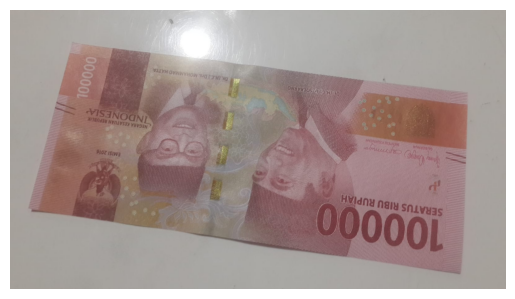

Processing: demo_data/100k1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
(SIFT) Predicted Class Index: [1]  Predicted Class: Class 2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
(ORB) Predicted Class Index: [4]  Predicted Class: Class 20000



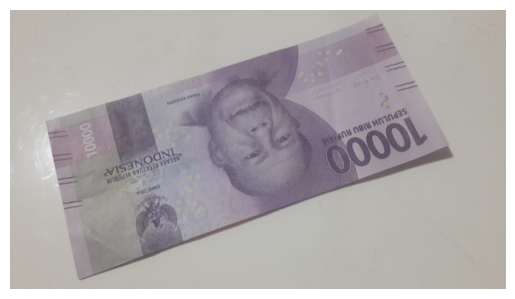

Processing: demo_data/10k1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
(SIFT) Predicted Class Index: [4]  Predicted Class: Class 20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
(ORB) Predicted Class Index: [1]  Predicted Class: Class 2000



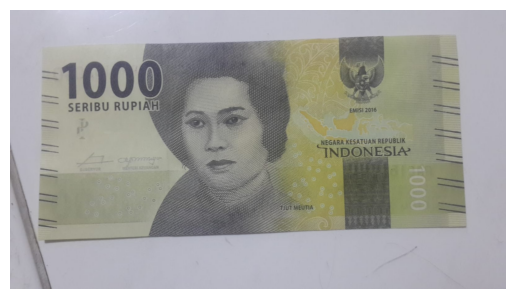

Processing: demo_data/1k1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
(SIFT) Predicted Class Index: [4]  Predicted Class: Class 20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
(ORB) Predicted Class Index: [1]  Predicted Class: Class 2000



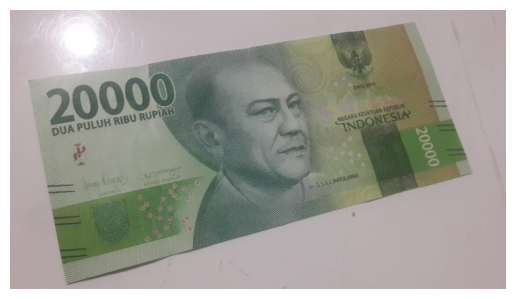

Processing: demo_data/20k1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
(SIFT) Predicted Class Index: [2]  Predicted Class: Class 5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
(ORB) Predicted Class Index: [1]  Predicted Class: Class 2000



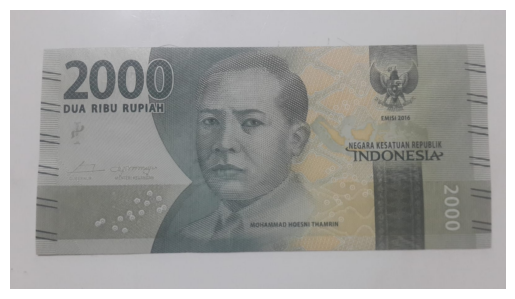

Processing: demo_data/2k1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
(SIFT) Predicted Class Index: [4]  Predicted Class: Class 20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
(ORB) Predicted Class Index: [0]  Predicted Class: Class 1000



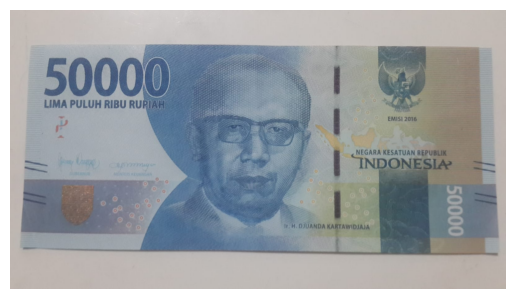

Processing: demo_data/50k1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
(SIFT) Predicted Class Index: [4]  Predicted Class: Class 20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
(ORB) Predicted Class Index: [0]  Predicted Class: Class 1000



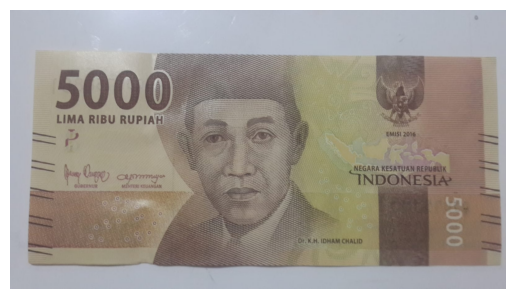

Processing: demo_data/5k1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
(SIFT) Predicted Class Index: [4]  Predicted Class: Class 20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
(ORB) Predicted Class Index: [0]  Predicted Class: Class 1000



In [6]:
path = 'demo_data'
for image_name in  os.listdir(path):
    image_path = 'demo_data/' + image_name
    
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    print(f'Processing: {image_path}')
    sift_descriptors, orb_descriptors, sift_keyp, orb_keyp = extract_features(image_path)

    sift_histogram = compute_bovw_histogram(sift_descriptors, kmeans_sift)
    orb_histogram = compute_bovw_histogram(orb_descriptors, kmeans_orb)

    sift_data = []
    sift_data.append(sift_histogram)
    sift_data = sift_scaler.transform(sift_data)

    orb_data = []
    orb_data.append(orb_histogram)
    orb_data = orb_scaler.transform(orb_data)
    
    predicted_class = sift_model.predict(sift_data)
    predicted_class_index = np.argmax(predicted_class, axis=1)
    predicted_class_name = class_labels[predicted_class_index[0]]
    print(f"(SIFT) Predicted Class Index: {predicted_class_index}  Predicted Class: {predicted_class_name}")

    predicted_class = orb_model.predict(sift_data)
    predicted_class_index = np.argmax(predicted_class, axis=1)
    predicted_class_name = class_labels[predicted_class_index[0]]
    print(f"(ORB) Predicted Class Index: {predicted_class_index}  Predicted Class: {predicted_class_name}\n")
